## Student Name: Tadhg Philibin e Silva
## Student ID: 22275363

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [421]:
colors = np.array(['orange', 'blue', 'pink', 'khaki',  'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    plt.figure(figsize=(12,12))
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [305]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)


In [306]:
df.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  
0                    1              1     0.841086  
1                    0              0     0.871711  
2                    1              1     0.385189  
3                    1              1     0.717012  
4                    1              1     0.860305

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   ApplicantIncome          614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    int64  
 5   Gender_Male              614 non-null    int64  
 6   Gender_nan               614 non-null    int64  
 7   Married_Yes              614 non-null    int64  
 8   Married_nan              614 non-null    int64  
 9   Self_Employed_Yes        614 non-null    int64  
 10  Self_Employed_nan        614 non-null    int64  
 11  Education_Not Graduate   614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
 14  Loan_Status_Y            6

In [308]:
df.describe().transpose()

count      mean       std       min       25%  \
Dependents               614.0  0.248100  0.336541  0.000000  0.000000   
ApplicantIncome          614.0  0.916588  0.412366  0.004634  0.662440   
LoanAmount               614.0  1.076222  0.338744  0.005026  0.883668   
Loan_Amount_Term         614.0  0.713355  0.134226  0.025000  0.750000   
Credit_History           614.0  0.855049  0.352339  0.000000  1.000000   
Gender_Male              614.0  0.796417  0.402991  0.000000  1.000000   
Gender_nan               614.0  0.021173  0.144077  0.000000  0.000000   
Married_Yes              614.0  0.648208  0.477919  0.000000  0.000000   
Married_nan              614.0  0.004886  0.069786  0.000000  0.000000   
Self_Employed_Yes        614.0  0.133550  0.340446  0.000000  0.000000   
Self_Employed_nan        614.0  0.052117  0.222445  0.000000  0.000000   
Education_Not Graduate   614.0  0.218241  0.413389  0.000000  0.000000   
Property_Area_Semiurban  614.0  0.379479  0.485653  0.000000  0.000000   
Property_Area_Urban      614.0  0.328990  0.470229  0.000000  0.000000   
Loan_Status_Y            614.0  0.687296  0.463973  0.000000  0.000000   
TotalIncome              614.0  0.862686  0.428068  0.005599  0.597383   

                              50%       75%       max  
Dependents               0.000000  0.333333  1.000000  
ApplicantIncome          0.815365  1.078246  3.357480  
LoanAmount               1.047319  1.229571  2.461145  
Loan_Amount_Term         0.750000  0.750000  1.000000  
Credit_History           1.000000  1.000000  1.000000  
Gender_Male              1.000000  1.000000  1.000000  
Gender_nan               0.000000  0.000000  1.000000  
Married_Yes              1.000000  1.000000  1.000000  
Married_nan              0.000000  0.000000  1.000000  
Self_Employed_Yes        0.000000  0.000000  1.000000  
Self_Employed_nan        0.000000  0.000000  1.000000  
Education_Not Graduate   0.000000  0.000000  1.000000  
Property_Area_Semiurban  0.000000  1.000000  1.000000  
Property_Area_Urban      0.000000  1.000000  1.000000  
Loan_Status_Y            1.000000  1.000000  1.000000  
TotalIncome              0.783902  1.035796  3.207353

# Task 2
- Plot the sum of squared distances from the data points (in loans_train_prepared.csv) 
    - to the centers of the k-means clusters for various values of k. 
    - Use the Elbow method to pick the best value of k. 
    - Attempt also another method for determining the best value of k. 
    - Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. 
    - Aim at producing meaningful clustering.

- Use at least two different methods for visualising the clustering. 

- Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

In [309]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(data)

## Plot the sum of squared distances from the data points to the centers of the k-means clusters for various values of k.

In [310]:
from sklearn.cluster import KMeans

In [311]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [312]:
ssd = []
silhouette_scores = []
max_clusters = 10

for k in range(2,max_clusters):
    
    model = KMeans(n_clusters=k, n_init='auto', max_iter=1000)
    
    cluster_labels = model.fit_predict(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    
    # record silhouette scores
    silhouette_avg = silhouette_score(scaled_X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    

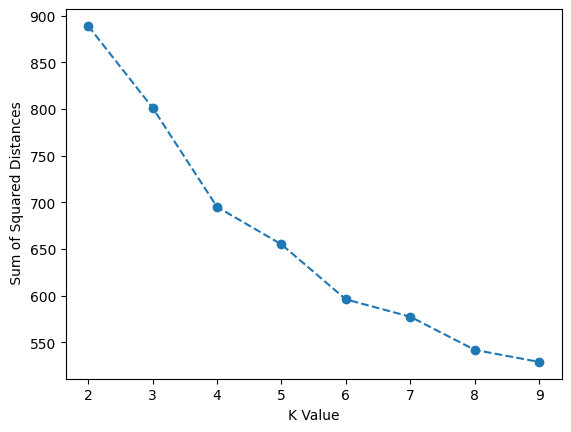

In [313]:
plt.plot(range(2,max_clusters),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances");

## Use the Elbow method to pick the best value of k.

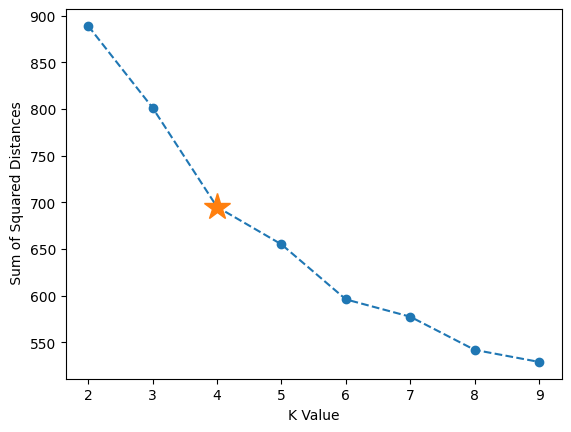

In [314]:
plt.plot(range(2,max_clusters), ssd, 'o--')
plt.plot([4], [ssd[2]], marker='*', ls='none', ms=20);
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances");

The elbow method suggests that 4 clusters is the ideal point, beyond which the imrovement in SSD may carry too heavy a cost in terms of overfitting.

## Attempt also another method for determining the best value of k. 

In [315]:
for silhouette_avg in silhouette_scores:
    print("For n_clusters =", k, "The silhouette_score is:", silhouette_avg)

For n_clusters = 9 The silhouette_score is: 0.17892097408070046
For n_clusters = 9 The silhouette_score is: 0.16780955348181525
For n_clusters = 9 The silhouette_score is: 0.2002270567882631
For n_clusters = 9 The silhouette_score is: 0.17888774730715684
For n_clusters = 9 The silhouette_score is: 0.20995942187886726
For n_clusters = 9 The silhouette_score is: 0.20581944647144124
For n_clusters = 9 The silhouette_score is: 0.20244473082260897
For n_clusters = 9 The silhouette_score is: 0.21326727850996222


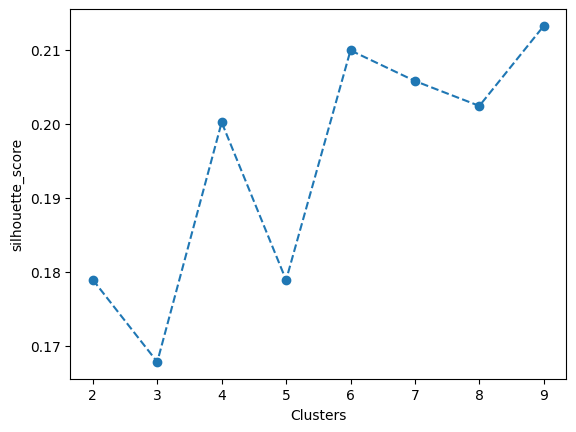

In [316]:
plt.plot(range(2,max_clusters),silhouette_scores,'o--')
plt.xlabel("Clusters")
plt.ylabel("silhouette_score");

## Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means.
Aim at producing meaningful clustering.

Between the elbow method and the silhouette coefficient, I think 4 is the appropriate number clusters. With this number, we achieve a strong silhouette score and 

## Use at least two different methods for visualising the clustering. 

In [317]:
k = 4

In [318]:
opt_model = KMeans(n_clusters=k, n_init='auto', max_iter=1000).fit(scaled_X)

In [319]:
# Apply a manifold-learning technique to project the data set to a 2D space 

data_and_centers = np.r_[scaled_X, opt_model.cluster_centers_]

In [320]:
data_and_centers.shape

(618, 16)

In [321]:
# Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

# Project both the data and the k-Means cluster centers to 2D.

mds = manifold.MDS(n_components=2, normalized_stress='auto')
XYcoordinates = mds.fit_transform(data_and_centers);

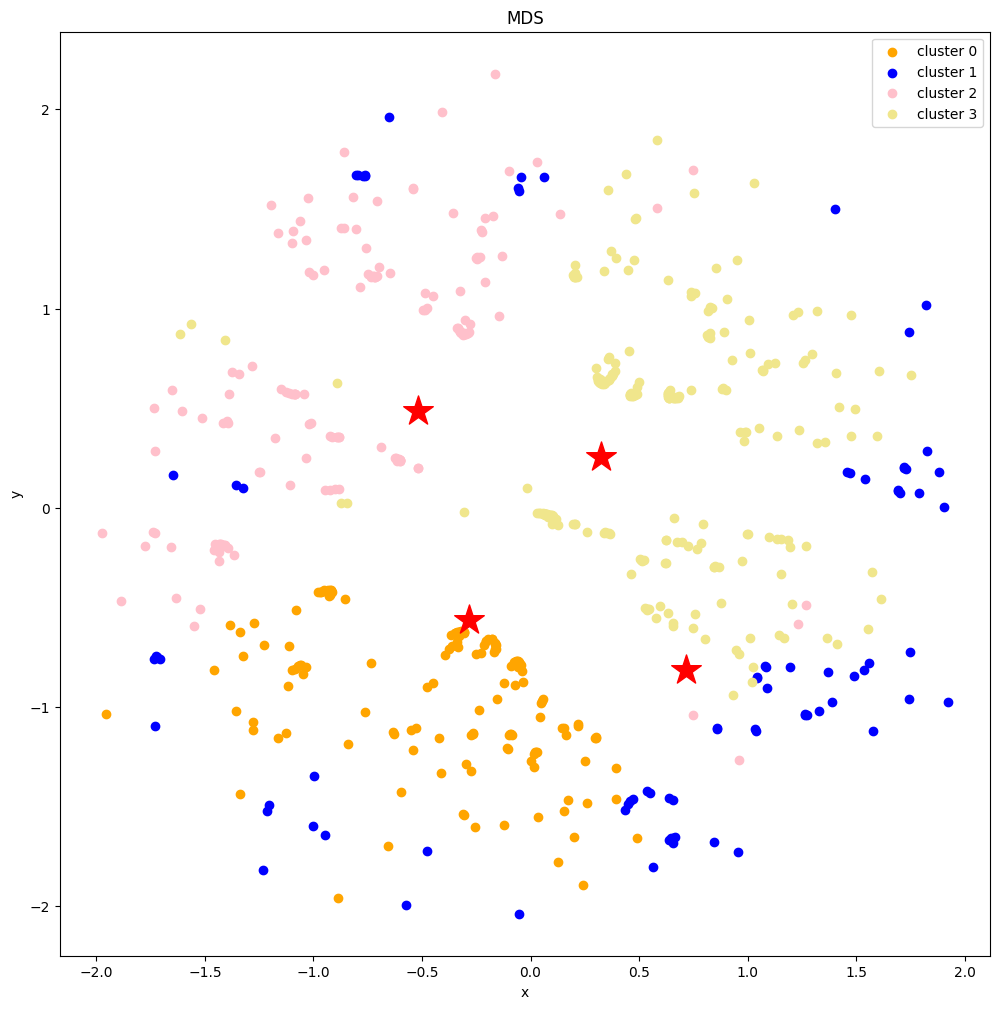

In [322]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=opt_model.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [323]:
XYcoordinates_tsne = manifold.TSNE(n_components=2).fit_transform(data_and_centers)

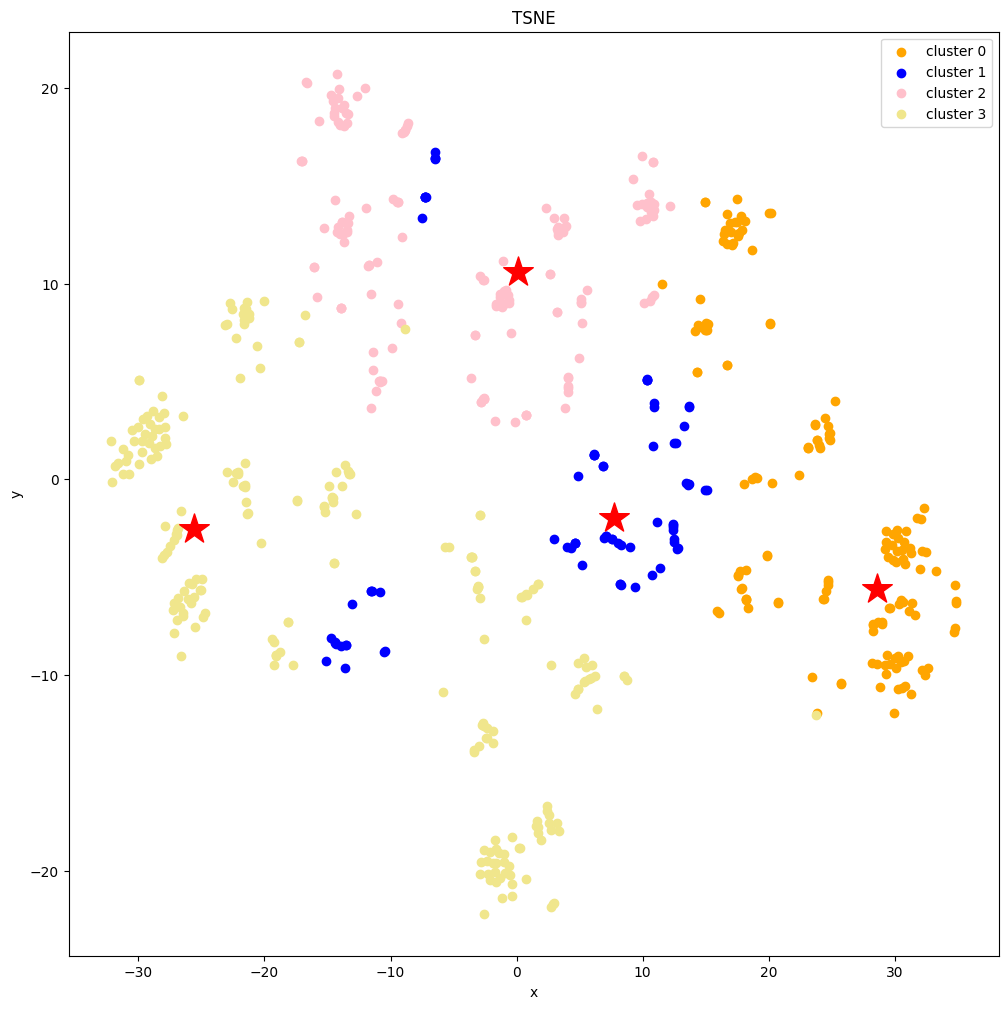

In [324]:
clustering_scatterplot(points=XYcoordinates_tsne[:-k,:], 
                       labels=opt_model.labels_,
                       centers=XYcoordinates_tsne[-k:,:], 
                       title='TSNE')

## Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

In [344]:
import seaborn as sns

In [336]:
df['cluster'] = opt_model.labels_

<AxesSubplot: >

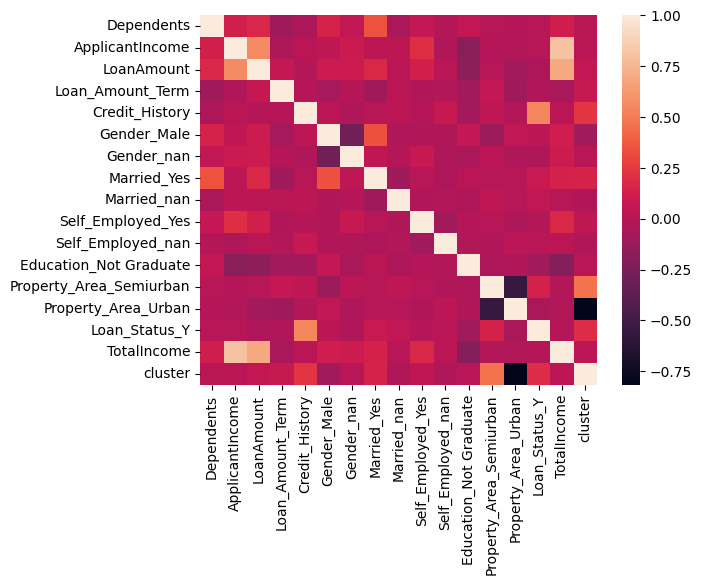

In [346]:
sns.heatmap(df.corr())

<AxesSubplot: xlabel='cluster', ylabel='count'>

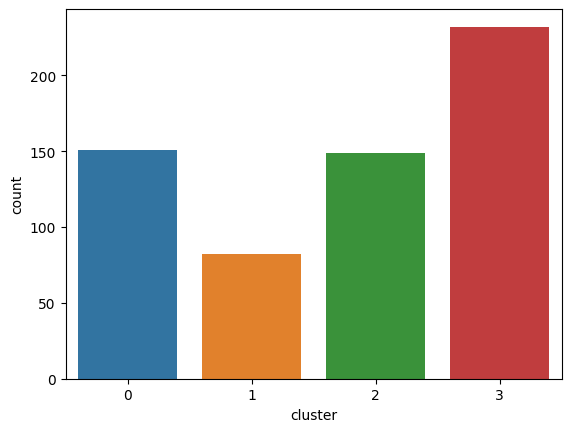

In [409]:
sns.countplot(data=df, x='cluster')

In [405]:
df.groupby('cluster').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.280353         0.919072    1.074554          0.686755   
1          0.268293         0.883670    1.067517          0.721037   
2          0.100671         0.914022    1.001621          0.735067   
3          0.314655         0.928255    1.128297          0.714009   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.993377     0.953642    0.013245     0.748344     0.006623   
1              0.000000     0.768293    0.036585     0.646341     0.000000   
2              0.979866     0.523490    0.020134     0.000000     0.013423   
3              0.987069     0.879310    0.021552     1.000000     0.000000   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                 0.105960           0.072848                0.172185   
1                 0.146341           0.012195                0.304878   
2                 0.134228           0.067114                0.234899   
3                 0.146552           0.043103                0.206897   

         Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
cluster                                                                
0                       0.000000             1.000000       0.768212   
1                       0.317073             0.365854       0.000000   
2                       0.483221             0.140940       0.758389   
3                       0.581897             0.000000       0.831897   

         TotalIncome  
cluster               
0           0.885429  
1           0.820308  
2           0.788103  
3           0.910762

# Conclusion
By looking at the table above we can argue that:

- Cluster 0 consists exclusively of those that are urban living and have quite a high TotalIncome
- Cluster 1 represents those for which we have no Credit_History
- Cluster 2 consists exclusively of the unmarried and those for which we have no marital info
- Cluster 3 consists of those given with the largest LoanAmount and largest ApplicantIncome / TotalIncome, they are all married


It would appear that Cluster 3 probably consists of older, more established families. They have the highest number of dependents and are most likely to live in semi-urban areas.

Cluster 2 is likely the youngest group. They have the lowest numberr of dependents, are almost all unmarried.

# Task 3

## Use another clustering algorithm (from the ones available in scikit-learn) for the loans_train_prepared dataset and an appropriate manifold-learning technique to visualise it.

In [325]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [454]:
bandwidth = estimate_bandwidth(scaled_X, quantile=0.15, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=False)
ms.fit(scaled_X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
k = len(labels_unique)
print("number of estimated clusters : %d" % k)

number of estimated clusters : 3


In [455]:
data_and_centers2 = np.r_[scaled_X, cluster_centers]

XYcoordinates_tsne2 = manifold.TSNE(n_components=2).fit_transform(data_and_centers2)

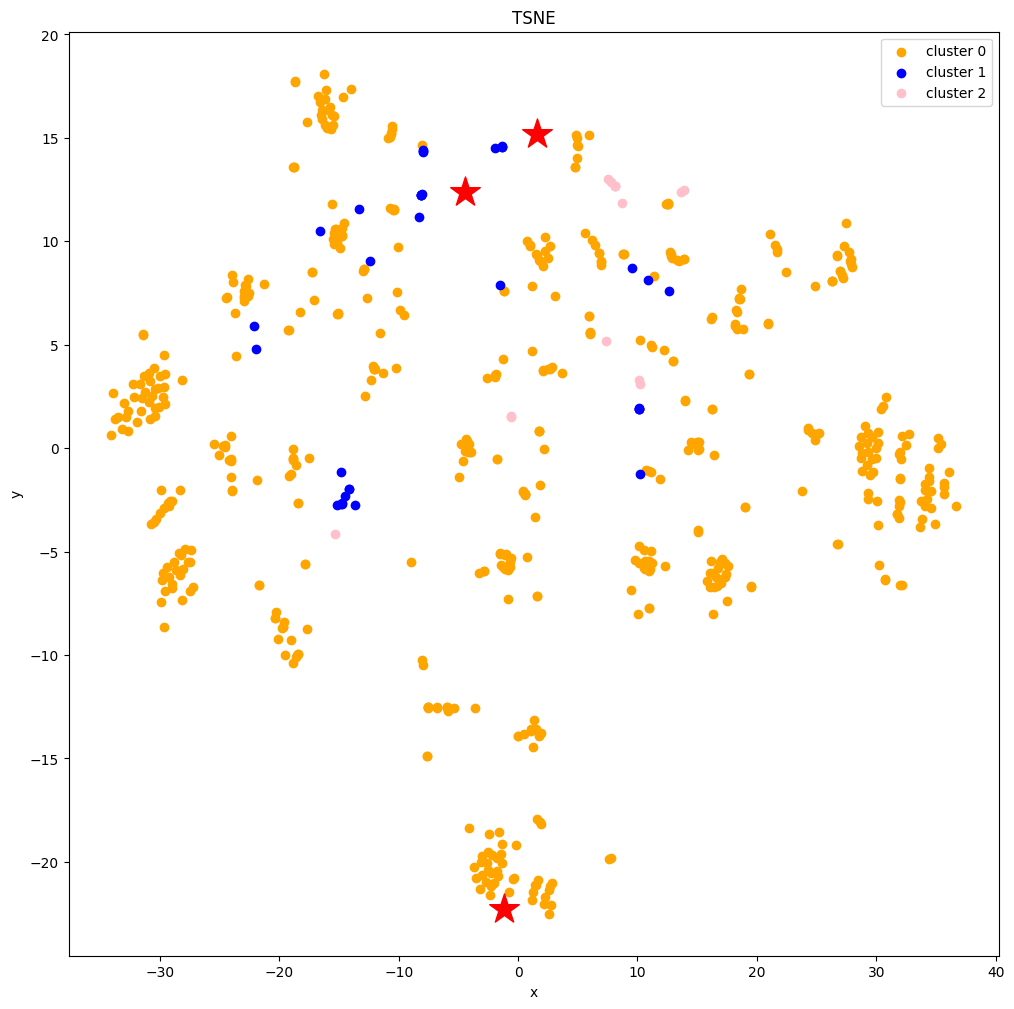

In [456]:
clustering_scatterplot(points=XYcoordinates_tsne2[:-k,:], 
                       labels=labels,
                       centers=XYcoordinates_tsne2[-k:,:], 
                       title='TSNE')

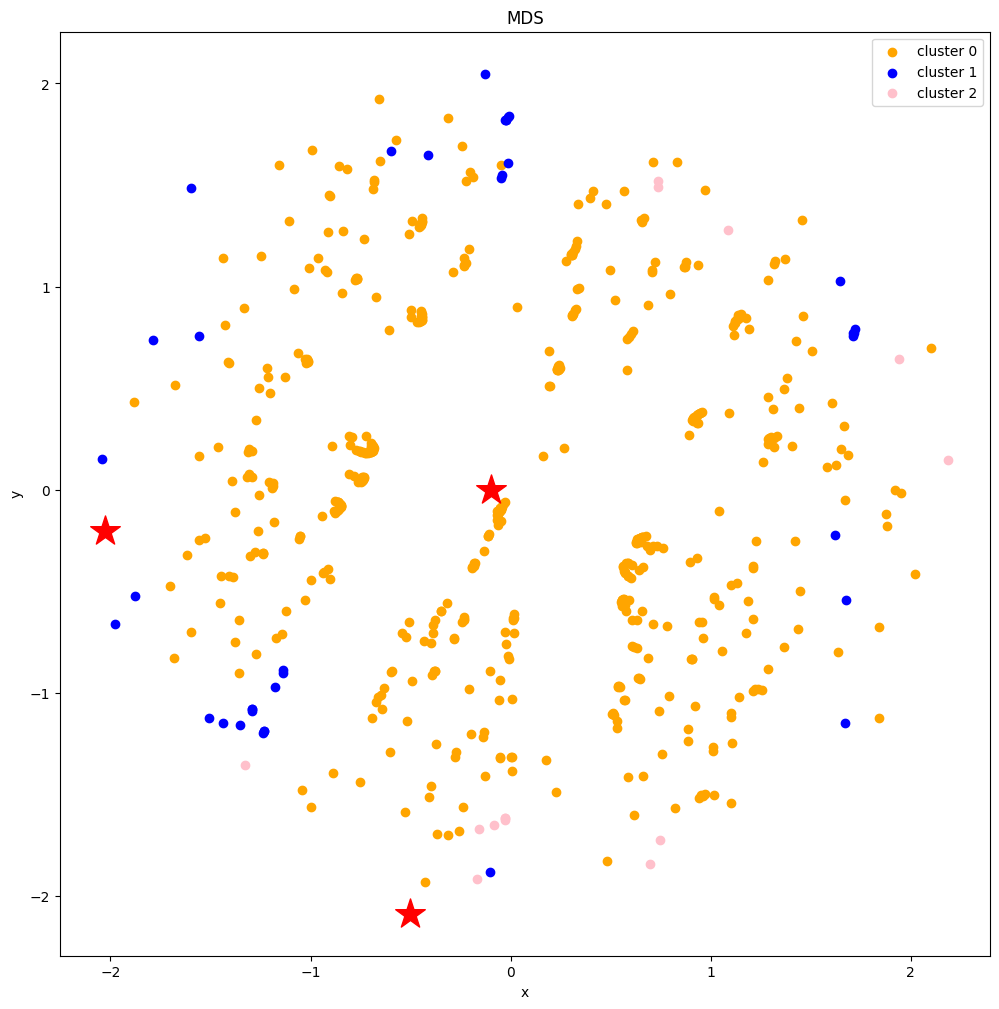

In [457]:
mds2 = manifold.MDS(n_components=2, normalized_stress='auto')
XYcoordinates2 = mds2.fit_transform(data_and_centers2);
clustering_scatterplot(points=XYcoordinates2[:-k,:], 
                       labels=labels, 
                       centers=XYcoordinates2[-k:,:], 
                       title='MDS')

In [458]:
from sklearn.manifold import SpectralEmbedding

In [459]:
embedding = SpectralEmbedding(n_components=2)
XYcoordinates3 = embedding.fit_transform(data_and_centers2)
XYcoordinates3.shape

(617, 2)

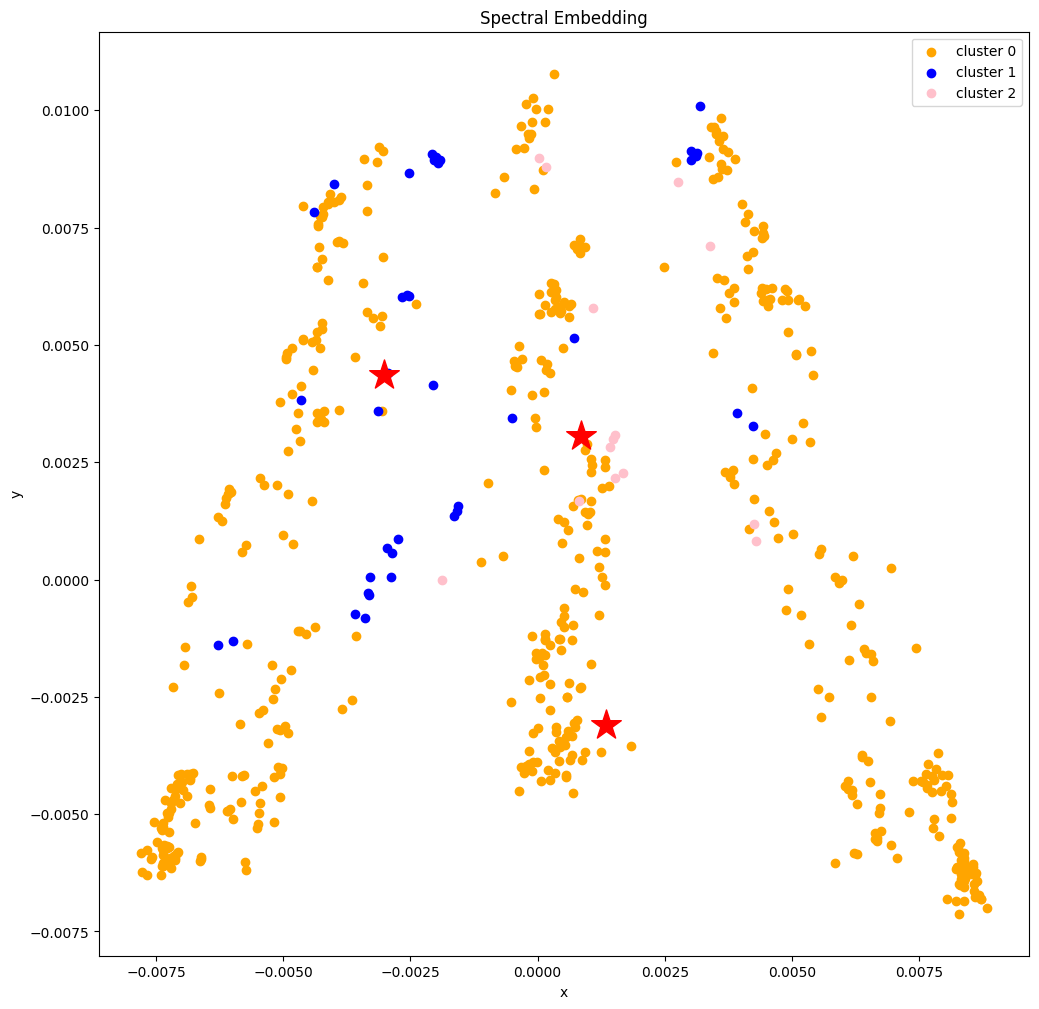

In [460]:
clustering_scatterplot(points=XYcoordinates3[:-k,:], 
                       labels=labels, 
                       centers=XYcoordinates3[-k:,:], 
                       title='Spectral Embedding')

In [424]:
from sklearn.cluster import DBSCAN

In [331]:
dbscan = DBSCAN(eps=1 ,min_samples=32)
dbscan.fit(scaled_X)

y_pred = dbscan.fit_predict(data)
dbscan_clusters = set(filter(lambda l: (l >= 0), dbscan.labels_))
outliers = list(dbscan.labels_).count(-1)

print('number of clusters: %d' % len(dbscan_clusters))
print('Outliers: %d' % outliers)

number of clusters: 3
Outliers: 451


<AxesSubplot: xlabel='cluster', ylabel='count'>

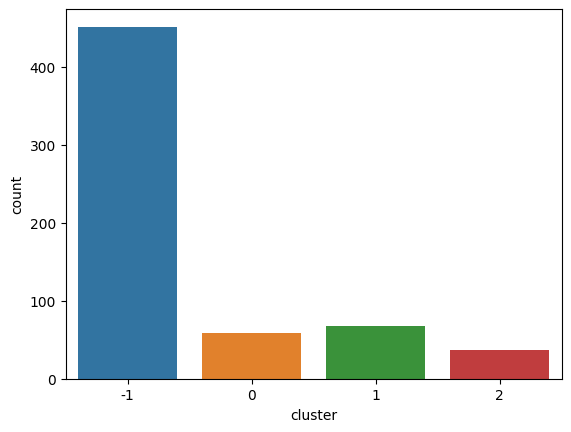

In [473]:
dfcopy = df.copy()
dfcopy['cluster'] = y_pred
sns.countplot(data=dfcopy, x='cluster')

## Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words in a markdown cell) and by visualising the clusterings with an appropriate manifold-learning technique.


### Comparing Kmeans & MeanShift:

In [461]:
df['cluster'] = ms.labels_

<AxesSubplot: xlabel='cluster', ylabel='count'>

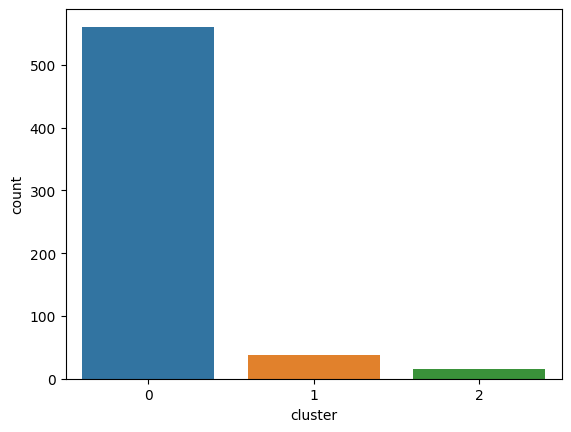

In [463]:
sns.countplot(data=df, x='cluster')

In [470]:
df.groupby('cluster').count()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0               561              561         561               561   
1                38               38          38                38   
2                15               15          15                15   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0                   561          561         561          561          561   
1                    38           38          38           38           38   
2                    15           15          15           15           15   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                      561                561                     561   
1                       38                 38                      38   
2                       15                 15                      15   

         Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
cluster                                                                
0                            561                  561            561   
1                             38                   38             38   
2                             15                   15             15   

         TotalIncome  
cluster               
0                561  
1                 38  
2                 15

In [462]:
df.groupby('cluster').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.245989         0.927586    1.080753          0.712121   
1          0.228070         0.816951    1.060145          0.756579   
2          0.377778         0.757708    0.947512          0.650000   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.921569     0.827094    0.007130     0.654189     0.005348   
1              0.157895     0.394737    0.210526     0.552632     0.000000   
2              0.133333     0.666667    0.066667     0.666667     0.000000   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                 0.133690           0.055258                0.204991   
1                 0.157895           0.026316                0.105263   
2                 0.066667           0.000000                1.000000   

         Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
cluster                                                                
0                       0.361854             0.340463       0.743316   
1                       0.763158             0.184211       0.131579   
2                       0.066667             0.266667       0.000000   

         TotalIncome  
cluster               
0           0.875467  
1           0.757813  
2           0.650349

The MeanShift algorithm does not require that the number of clusters be provided before-hand, thus there is no need to perform the elbow method or derive silhouette coefficients. 

With MeanShift, the clustering is such that almost all samples are grouped into the first cluster (0). 
This cluster can be characterized by a very high Credit_History and a high income relative to the other clusters. 

K-means did not segment the Credit_History grouping so much compared to MeanShift.

K-means also product much more balanced clusters. 

With the MeanShift clustering, it is questionable whether clusters 1 and 2 are even big enough to be useful. 

Cluster 3 has 'Education_Not Graduate' of 0 suggesting no single graduates in this group. KMeans did not segment this property in any meaningful way. Of course, since cluster 3 only has 15 samples, perhaps we should not ponder this too much.